# __Física Computacional:__ _Tarea 2_

### Joshua Briones Andrade
#### Fecha de entrega: _3 de Febrero_
_______________

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 6] # ancho, alto de figuras
plt.rcParams["font.size"] = 12 #tamaño de letra de las figuras

## Interpolación

1. Sea $f(x) = 2\sin(\pi x/6)$ (con el ángulo medido en radianes).

    a) Use el polinomio de Lagrangre $P_2$ con nodos $x_0 = 0$, $x_1 = 1$ y $x_2 = 3$ para aproximar $f(2)$ y $f(2.4)$,

    b) Use el polinomio de Lagrangre $P_3$ con nodos $x_0 = 0$, $x_1 = 1$, $x_2 = 3$ y $x_3 = 5$ para aproximar $f(2)$ y $f(2.4)$,

    c) Use el polinomio de Lagrangre $P_2$ con nodos $x_0 = 0$, $x_1 = 1$ y $x_2 = 3$ para aproximar $f(4)$ y $f(3.5)$,

    d) Use el polinomio de Lagrangre $P_3$ con nodos $x_0 = 0$, $x_1 = 1$, $x_2 = 3$ y $x_3 = 5$ para aproximar $f(4)$ y $f(3.5)$.
-----

In [2]:
# Primero definimos la función 

f = lambda x: 2*np.sin(np.pi*x/6)

Puesto que los polinomios de Lagrange de grado $n$ estan definidos para $n+1$ puntos $(x_i,y_i)$ como:

\begin{equation*}
P_n(x)=y_0L_0(x)+y_1L_1(x)+\dots+y_nL_n(x)
\end{equation*}

con $L_k(x)$ definida como

\begin{equation*}
L_k(x)=\frac{(x-x_0)\dots(x-x_{k-1})(x-x_{k+1})\dots(x-x_n))}{(x_k-x_0)\dots(x_k-x_{k-1})(x_k-x_{k+1})\dots(x_k-x_n))}
\end{equation*}

tal que $P_n(x_i)=y_i$, para $i=\{0,1,\dots n\}$

In [3]:
# Definimos la función general para el polinomio P_n(x) de Lagrange como "PnLag":

def PnLag(x, puntos):
    L = []; P = 0;
    n = len(puntos);
    for k in range(n):
        l1 = 1; l2 = 1
        for i in range(n):
            if i != k:
                l1 *= (x-puntos[i])
                l2 *= (puntos[k]-puntos[i])
            else: True
        L.append(l1/l2)
    for j in range(n):
        P += f(puntos[j])*L[j]
    return P

# dado que ya definimos f(x) y conocemos la dimensión de la lista puntos, esta bien definida

f(2.0)=1.7321, P_3(2.0)=1.6667, er = 6.5384e-02 
f(2.4)=1.9021, P_3(2.4)=1.84, er = 6.2113e-02 


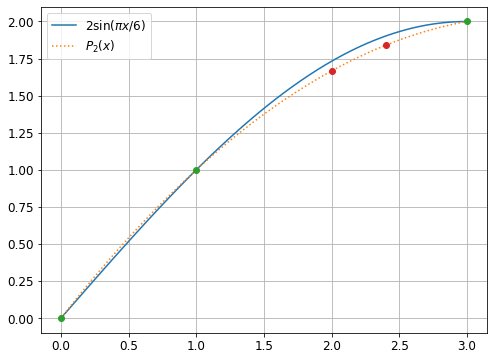

In [4]:
# a) P_2 con X = [0,1,3] para aproximar f(2) y f(2.4)

puntos = np.array([0,1,3])
puntos2 = np.array([2,2.4])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));

plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_2(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(2.0)=1.7321, P_3(2.0)=1.7, er = 3.2051e-02 
f(2.4)=1.9021, P_3(2.4)=1.8736, er = 2.8513e-02 


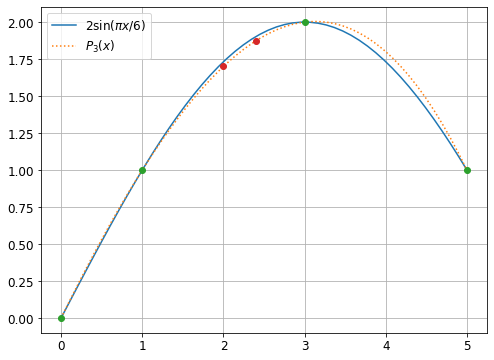

In [5]:
# b) P_3 con X=[0, 1, 3, 5] para aproximar f(2) y f(2.4),

puntos = np.array([0,1,3,5])
puntos2 = np.array([2,2.4])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));

plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(4.0)=1.7321, P_3(4.0)=2.0, er = 2.6795e-01 
f(3.5)=1.9319, P_3(3.5)=2.0417, er = 1.0982e-01 


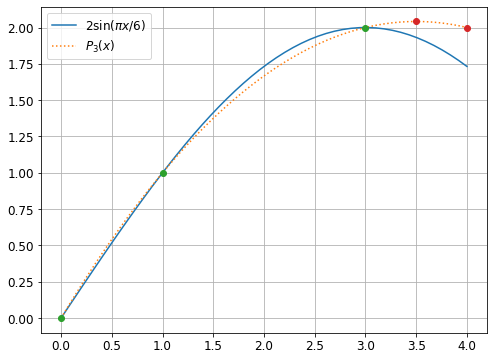

In [6]:
# c) P_2 con X=[0, 1, 3] para aproximar f(4) y f(3.5)

puntos = np.array([0,1,3])
puntos2 = np.array([4,3.5])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));
                
plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(4.0)=1.7321, P_3(4.0)=1.8, er = 6.7949e-02 
f(3.5)=1.9319, P_3(3.5)=1.9688, er = 3.6898e-02 


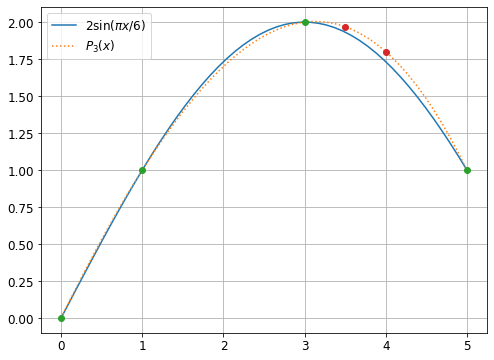

In [7]:
# d) P_3 con X=[0, 1, 3, 5] para aproximar f(4) y f(3.5)

puntos = np.array([0,1,3,5])
puntos2 = np.array([4,3.5])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));
                
plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

2. Considera $f(x)=3.6/x$, De la siguiente tabla 

| $f(x)=\frac{3.6}{x}, x=2.5,\ 3.5$                    |
|:---------------------------------------------------------:|

| $k$ 	| $x_k$ 	| $f$$(x_k)$  |
|:---:	|:-----:	|:-----------:|
|  0  	|  1.0  	|   3.60  	  |
|  1  	|  2.0  	|   1.80      |
|  2  	|  3.0  	|   1.20      |
|  3  	|  4.0  	|   0.90      |
|  4  	|  5.0  	|   0.72      |



**a)** Calcula la tabla de diferencias divididas

**b)** Escribe los polinomios interpolados de Newton para $P_1(x)$, $P_2(x)$, $P_3(x)$ y $P_4(x)$.

In [8]:
# a) Importamos las librerias y funciones para facilitar el cálculo

from collections import namedtuple 
    #namedtuple() funcion que permite hacer colecciones con tublas dadas
from itertools import zip_longest 
    # zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D- --> #funcion dada para acomodar valores juntos
from functools import partial

f = lambda x: 3.6/x;  X = [1.0 + i for i in range(5)]  # Sonlos valores de la tabla anterior
##Tabla de diferencias divididas

f_i = [f(X[i]) for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i]) / (X[i+1] - X[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X[i+2] - X[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X[i+3] - X[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X[i+4] - X[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii, fillvalue="-")), 
          index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])
# print(ffdat)
pd.options.display.float_format = '{:,.5f}'.format   # formato a la tabla 
ffdat.insert(0, "$x_i$", X) #list.insert(index, element)
ffdat

,$x_i$,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1.00000,3.60000,-1.80000,0.60000,-0.15000,0.03000
1,2.00000,1.80000,-0.60000,0.15000,-0.03000,-
2,3.00000,1.20000,-0.30000,0.06000,-,-
3,4.00000,0.90000,-0.18000,-,-,-
4,5.00000,0.72000,-,-,-,-


b) Para esto conviene recordar la relación de recursión:

\begin{equation*}
    P_n(x) = P_{n - 1}(x) + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})
\end{equation*}

donde $P_{n - 1}(x)$ interpola a $f(x)$ en los puntos en $\{x_1, \dots, x_{n - 1}\}$

\begin{align*}
   P_1(x) &=3.6-1.8(x-1)\\
   P_2(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2) \\
   P_3(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2)-0.15(x-1)(x-2)(x-3)\\
   P_4(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2)-0.15(x-1)(x-2)(x-3)+0.03(x-1)(x-2)(x-3)(x-4)\\
\end{align*}

3. Con la interpolación baricentrica, resuelve

    **a)** Considera la función $\ln(x + 2)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\ln(x+ 2)−P_3|$

    **b)** Considera la función $\sin(x)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\sin(x) − P_3|$

Primero recordamos la distribución de los nodos de Chebishev de primera clase

![nodos](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/chebyshev.jpg?raw=true)

\begin{equation*}
    x_j=\cos\frac{(2j+1)\pi}{2n+2},\quad j=0,1,\dots,n
\end{equation*}

de donde se tiene que los coeficientes de peso son $\omega_j$ tales que

\begin{equation*}
    \omega_j=(-1)^j\sin\frac{(2j+1)\pi}{2n+2},\quad j=0,1,\dots,n
\end{equation*}

Y también la formula simplificada de los Polinomios de Lagrange

\begin{equation*}
    P_n(x)=\frac{\sum_j^n\frac{\omega_j}{x-x_j}y_j}{\sum_j^n\frac{\omega_j}{x-x_j}}
\end{equation*}

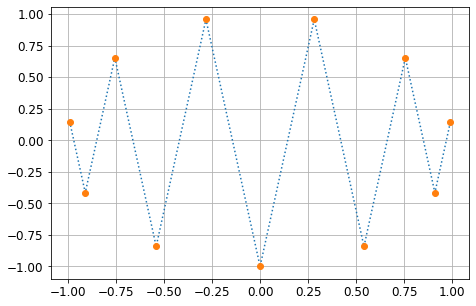

In [9]:
# Definimos las funciones para estas distribuciones

def Chev(n):
    X = []; W = [];
    for k in range(n+1):
        X.append(np.cos((2*k+1)*np.pi/(2*(n)+2)))
        W.append((-1)**k*np.sin((2*k+1)*np.pi/(2*n+2)))
    X=np.array(X); W=np.array(W);
    return X, W

plt.figure(figsize=(7.5,5))
plt.plot(Chev(10)[0],Chev(10)[1], ":")
plt.plot(Chev(10)[0],Chev(10)[1], "o")
plt.grid(); plt.show()

In [10]:
# Ahora redefinimos nuestra función simplificada de Lagrange

def PnLag2(x, X, W, Y):
    L = []; P = 0;
    n = len(X);
    l1 = 0; l2 = 0
    for k in range(n):
        l1 += (W[k]/(x-X[k]))*Y[k]
        l2 += (W[k]/(x-X[k]))
    return l1/l2

'La cota del error es: 4.0032e-03'

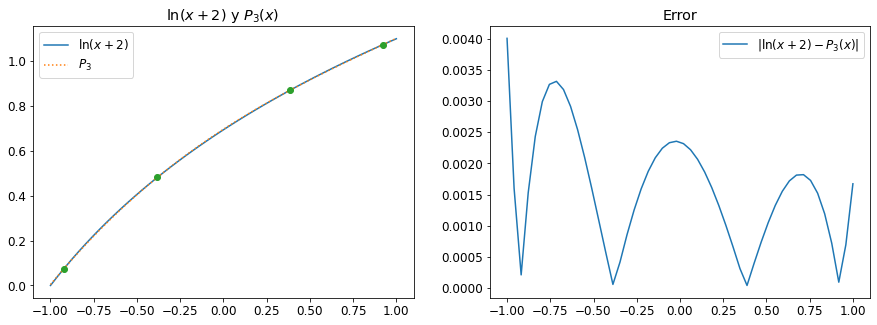

In [11]:
# a) Determina el P_3 y la cota del error |ln(x+ 2)−P_3|
# dado que debemos calcular P_3, consideramos n=3

f1 = lambda x: np.log(x+2)
X, W = Chev(3);
Y = f1(X);

x = np.linspace(-1,1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
xr = np.linspace(0, 1.4)
ax1.plot(x, f1(x), label=r"$\ln(x+2)$")
ax1.plot(x, PnLag2(x, X, W, Y), ":", label=r"$P_3$")
ax1.plot(X, Y, "o")
ax1.set_title(r"$\ln(x+2)$ y $P_3(x)$ ")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(x, abs(f1(x)-PnLag2(x, X, W, Y)), label=r"$|\ln(x+2)-P_3(x)|$")
ax2.set_title(r"Error")
ax2.legend()

f"La cota del error es: {abs(f1(-1)-PnLag2(-1, X, W, Y)):.4e}"

'La cota del error es: 9.9304e-04'

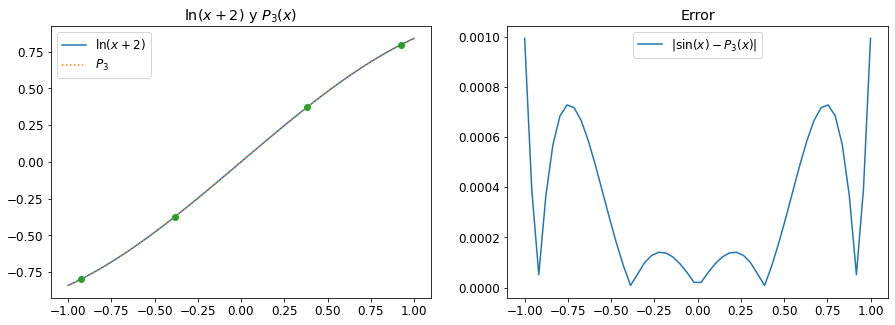

In [12]:

# b) Determina el P_3 y la cota del error |sin(x) − P_3|
# dado que debemos calcular P_3, consideramos n=3

f2 = lambda x: np.sin(x)
X, W = Chev(3);
Y = f2(X);

x = np.linspace(-1,1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
xr = np.linspace(0, 1.4)
ax1.plot(x, f2(x), label=r"$\ln(x+2)$")
ax1.plot(x, PnLag2(x, X, W, Y), ":", label=r"$P_3$")
ax1.plot(X, Y, "o")
ax1.set_title(r"$\ln(x+2)$ y $P_3(x)$ ")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(x, abs(f2(x)-PnLag2(x, X, W, Y)), label=r"$|\sin(x)-P_3(x)|$")
ax2.set_title(r"Error")
ax2.legend()

f"La cota del error es: {abs(f2(-1)-PnLag2(-1, X, W, Y)):.4e}"

## Integración

4. **Integración Numérica**
    Una corriente alterna está descrita por
    
    \begin{equation}\label{corriente}
        i(t)=i_0\left(\sin\frac{\pi t}{t_0}-\beta \sin\frac{2\pi t}{t_0}\right)
    \end{equation}

    donde $i_0=1$, $t_0=0.05\ s$ y $\beta=0.2$. Obtén numéricamente la corriente cuadrática media definida como
    
    \begin{equation}\label{rms}
        i_{rms}=\sqrt{\frac{1}{t_0}\int_0^{t_0}[i(t)]^2dt}
    \end{equation}
    
    Resuelve por el método que prefieras, defiende el método que usas y determina el error de tu resultado para distintas $N$.

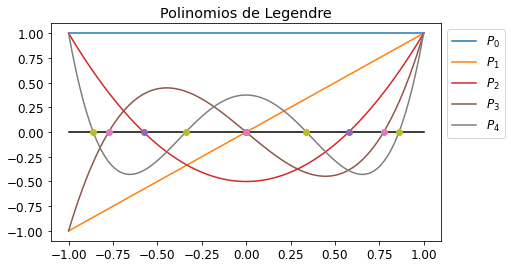

In [13]:
# Escogí el método de cuadratura Gaussiana por lo que voy a importar unas funciones especiales para simplificar el cálculo
from scipy.special import legendre, roots_legendre

def raices(n):
    y=roots_legendre(n)
    return y[0]

def P(x,n):
    Leg = legendre(n)
    y = Leg(x)
    return y

x = np.linspace(-1,1,100); plt.figure(figsize=(7,4))
plt.plot(x,0*x,'k-')
plt.plot(x,P(x,0),label=r'$P_0$') 
for i in range(1,5):
    plt.plot(x,P(x,i),label=r'$P_'+str(i)+'$') 
    plt.plot(raices(i),P(raices(i),i),'o')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)  
plt.title('Polinomios de Legendre'); plt.show()

Nos falta calcular los pesos $\omega_k$

\begin{equation*}
    \omega_k=\left[\frac{2}{1-x^2}\left(\frac{dP_n}{dx}\right)^{-1}\right]_{x=x_k}
\end{equation*}


In [14]:
# Construimos la función generadora de las raices y los pesos para la distribución con cuadratura Gaussiana

# def GaussXW(n, h=1e-15):
#     X = raices(n); W = [];
#     for x in X:    
#         dP = (P(x+h,n)-P(x-h,n))
#         w1 = 2/(1-x**2)
#         w2 = 2*h/dP
#         W.append(w1*w2)
#     X = np.array(X)
#     W = np.array(W)
#     return X, W

def gaussxw(N):
    #Aproximación inicial de las raíces de los polinomios de Legendre
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    X = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Encontramos ceros de Legendre con Newton-Raphson
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(X)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*X*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-X*p1)/(1-X*X)
        dx = p1/dp
        X -= dx
        delta = max(abs(dx))

    # Calculando los pesos
    W = np.array(2*(N+1)*(N+1)/(N*N*(1-X*X)*dp*dp))
    X = np.array(-1*raices(N)[::-1])
    return X,W

def GaussXWab(N, a, b):
    X, W = gaussxw(N)
    return 0.5*(b-a)*X+0.5*(b+a),0.5*(b-a)*W

Finalmente 

\begin{equation*}
    \int_a^bf(x)dx\approx\int_a^bP_n(x)dx=\sum_{k=0}^n\omega_kf(x_k)
\end{equation*}

In [15]:
def IntGauss(N, a, b, f):
    X, W = GaussXWab(N, a, b)
    s = 0;
    for k in range(N):
        s += W[k]*f(X[k]);
    return s

i0 = 1; beta = 0.2; t0 = 0.05; #seg
I = lambda t: i0*(np.sin(np.pi*t/t0)-beta*np.sin(2*np.pi*t/t0));
I2 = lambda t: I(t)**2;
a=0; b=0.05;

for i in range(6):    
    print(f"Para n={2+2*i}: ii_rms = {np.sqrt((1/b)*IntGauss(2+2*i, a, b, I2)):.10},\t er = {abs(np.sqrt((1/b)*IntGauss(50, a, b, I2))-np.sqrt((1/b)*IntGauss(2+2*i, a, b, I2))):.4e}")
    
# print(f"\n Error con n=8: ii_rms_10-ii_rms_5 = {np.sqrt((1/b)*IntGauss(10, a, b, I2))-np.sqrt((1/b)*IntGauss(5, a, b, I2)):.4e})

Para n=2: ii_rms = 0.6460455494,	 er = 7.5065e-02
Para n=4: ii_rms = 0.7224823376,	 er = 1.3721e-03
Para n=6: ii_rms = 0.7211297728,	 er = 1.9518e-05
Para n=8: ii_rms = 0.7211103073,	 er = 5.2245e-08
Para n=10: ii_rms = 0.7211102551,	 er = 4.8788e-11
Para n=12: ii_rms = 0.7211102551,	 er = 1.9984e-14


Consideramos este método de los mejores ya que esta basado en la interpolación baricentrica por lo que se reduce el error de runge al asignarle una distribución de puntos no-homogenea y así hacer la integración solo dependiente del producto de los pesos con las proyecciones sobre f(x).

5. **El límite de difracción de un telescopio**
    Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de luz en nuestros telescopios. La luz de las estrellas puede tratarse efectivamente como si viniera de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda $\lambda$, pasa a través de la circular apertura de un telescopio (que asumiremos que tiene un radio unitario) y está enfocado por el telescopio en el plano focal, produce no solo un punto, sino un patrón de difracción circular que consiste en una mancha central rodeada por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por
    
    \begin{equation}\label{intensidad}
        I(r)=\left(\frac{J_1(kr)}{kr}\right)^2,
    \end{equation}
    
    donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ y $J_1(x)$ es una la función de Bessel. Las funciones de Bessel $J_m$ están dadas por 
    
    \begin{equation}\label{bessel}
        J_m(x)=\frac{1}{\pi}\int_0^\pi \cos(m\theta-x\sin\theta)d\theta,
    \end{equation}
    
    donde $m$ son enteros no negativos y $x\geq 0$.
    
    Hacer una función de Python $J(m, x)$ que calcula el valor de $J_m(x)$ usando Simpson con $N= 1000$ puntos. Usamos la función en un programa para hacer una gráfica de las funciones de Bessel $J_0$, $J_1$ y $J_2$ en función de $x$, con valores de $x = 0$ a $x = 20$. 
    
    Hacer un segundo programa que haga un diagrama de densidad de la intensidad del patrón circular de difracción de una fuente de luz puntual con $\lambda = 500$ nm, en una región cuadrada del plano focal, usando la fórmula dada arriba. Tu imagen debe cubrir valores de $r$ desde $0$ hasta aproximadamente $1\ \mu m$.
    
   ![micmic](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/micmic1.jpg?raw=true)
   
   ___Hint:___ El punto central en el patrón de difracción es tan brillante que puede ser difícil ver los anillos alrededor en la pantalla de la computadora. Si te encuentras con este problema, una forma sencilla de solucionarlo es usar la opción `imshow(x,vmax=0.1)`

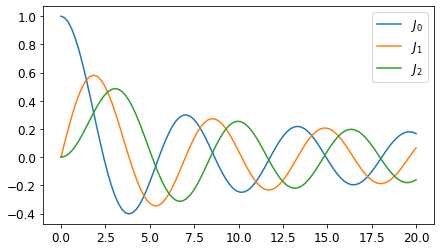

In [16]:
# Para poder resolverlo, definimos una funicón para la integración por método de Simpson

def Simpson(f, a, b, N):
    h=float((b-a)/N)
    suma = f(a)+f(b) + 4*f(b-h)
    for k in range(1,N//2):
        suma += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    suma *= h/3
    return suma

def J(m,x):
    f = lambda theta: np.cos(m*theta - x*np.sin(theta))
    N = 1000; a = 0; b = np.pi;
    s = Simpson(f, 0, b, N)
    return s / np.pi

x = np.linspace(0,20,100)
plt.figure(figsize=(7,4))
for i in range(3):
    plt.plot(x,J(i,x),label=r"$J_"+str(i)+"$")
plt.legend(); plt.show()

<Figure size 576x432 with 0 Axes>

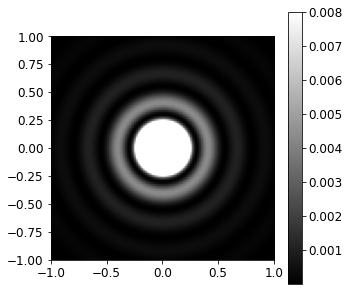

In [17]:
# Definimos el mallado y la función sobre la nueva variable r^2=x^2+y^2

x, y = np.mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x**2+y**2)

long = 0.5; # mm
k = 2*np.pi / long

I = (J(1,r*k)/(k*r))**2
plt.gray(); plt.figure(figsize=(5,5))
plt.imshow(I,vmax=0.008,extent=(-1,1,-1,1))
plt.colorbar()
plt.show()

6. **Constante de Stefan-Boltzmann**
    La teoría de Planck de radiación térmica nos dice que en el intervalo de frecuencia angular $\omega$ a $\omega + d\omega$, un cuerpo negro de área unitaria irradia electromagnéticamente una cantidad de energía térmica por segundo igual a $I(\omega)d\omega$, donde
    
    \begin{equation}\label{energia termica}
        I(\omega)=\frac{\hbar}{4\pi^2c^2} \frac{\omega^3}{e^{\hbar\omega/\kappa_BT}-1}
    \end{equation}
    
    La tasa total a la que un cuerpo negro irradia energía por unidad de área sobre todas las frecuencias, es
    
    \begin{equation}\label{cuerpo negro}
        W=\frac{\kappa_B^4T^4}{4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}
    \end{equation}
    
    Integra numéricamente y encuentra $W$ con todos los métodos de integración que conocemos.    

Siguiendo las notas del libro de Marc Newmann, *Computational Physics*, para poder resolver integrales numéricas sobre rangos infinitos como $\int_0^\infty f(x)dx$ hacemos el siguiente cambio de variable

\begin{equation*}
    x=\frac{z}{1-z}
\end{equation*}

entonces $dx=dz/(1-z)^2$ por lo que

\begin{equation*}
    \int_0^\infty f(x)dx=\int_0^1 \frac{1}{(1-z)^2}f\left( \frac{z}{1-z}\right)dz,
\end{equation*}

Por lo que en nuestro caso especifico quedaría como
\begin{equation*}
        \int_0^\infty\frac{x^3}{e^x-1}dx=\int_0^1\frac{z^3}{(1-z)^5}\frac{1}{e^{\frac{z}{1-z}}-1}dz
\end{equation*}


In [18]:
# Traemos la función del método del trapecio
def trapecio(n, a, b, f):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

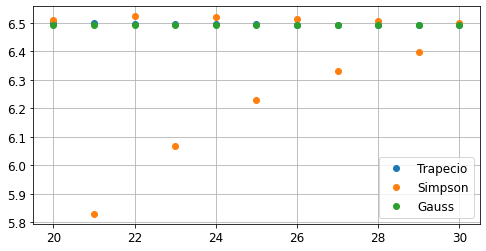

In [19]:
from scipy import constants as cte

def Bltz(z):
    g1 = z**3/(1-z)**5 
    g2 = np.exp(z/(1-z))-1
    return g1/g2

a = 0.01; b = 1-0.01;
def Integral(n):
    return np.array([trapecio(n, a, b, Bltz), Simpson(Bltz, a, b, n), IntGauss(n, a, b, Bltz)])

plt.figure(figsize=(8,4))
plt.plot([k for k in range(20,31)], [Integral(k)[0] for k in range(20,31)], "o", label="Trapecio")
plt.plot([k for k in range(20,31)], [Integral(k)[1] for k in range(20,31)], "o", label="Simpson")
plt.plot([k for k in range(20,31)], [Integral(k)[2] for k in range(20,31)], "o", label="Gauss")
plt.grid(); plt.legend(); plt.show()

In [20]:
from scipy import constants as cte   
ct1=cte.k**4/(4*cte.pi**2*cte.c**2*cte.hbar**3)

def Boltzmann(n): 
    return Integral(n) * ct1

N = 100;
Valor_real= cte.sigma
list = [];

for i in range(3):
    err1=abs(Valor_real-Boltzmann(N)[i])
    err2=abs((Valor_real-Boltzmann(N)[i]) / Valor_real)*100
    list.append([Valor_real, Boltzmann(N)[i], err1, err2])
    
nombres=['Trapecio','Simpson','Gauss']
cols = ["Valor Real","Valor Obtenido","Error absoluto","Error %"]
tabla = pd.DataFrame(list, index=nombres, columns=cols)
pd.options.display.float_format = '{:,.10e}'.format   # formato a la tabla
tabla


,Valor Real,Valor Obtenido,Error absoluto,Error %
Trapecio,5.6703744190e-08,5.6703739733e-08,4.4571039187e-15,7.8603344142e-06
Simpson,5.6703744190e-08,5.6703735166e-08,9.0243991343e-15,1.5914996908e-05
Gauss,5.6703744190e-08,5.6703741203e-08,2.9865005490e-15,5.2668489386e-06


7. **Producción de fotones en colisiones de iones pesados**
    En una colisión de iones pesados (Cu, Pb, Au, U, etc.) se generan fotones como producto de las interacciones fuerte y electromagnética que tienen lugar. La cantidad de fotones producidos es proporcional a
    
    |\begin{align*}\label{N}
    N(\omega_p)\sim f(\omega_p) =&\frac{\alpha_{em}\pi}{2(2\pi)^6\omega_q} \int_0^{\omega_q}d\omega_p\ (2\omega_p^2+\omega_q^2-\omega_p\omega_q)e^{-g_f(\omega_p,\omega_q)}n(\omega_p)[1+2n(|\omega_q-\omega_p|)]\\
    & \times{I_0[g_f(\omega_p,\omega_q)]-I_1[g_f(\omega_p,\omega_q)]},
    \end{align*}
    
    donde 
    
    \begin{equation*}
        g_f(\omega_p,\omega_q)=\frac{\omega_p^2+\omega_q^2-\omega_p\omega_q}{2|eB|},
    \end{equation*}
    
    y $n(\omega)$ es una distribución tipo Bose-Einstein dada por
    
    \begin{equation*}\label{eq:}
        n(\omega)=\frac{3}{e^{\omega/\Lambda}-1},
    \end{equation*}
    
    y las funciones $I_0$ e $I_1$ son funciones de Bessel modificadas de primera clase.
    
    a) Calcula $f(\omega_q)$ de manera numérica para un campo magnético de intensidad $|eB| = 0.02$
    GeV2, una constante $\Lambda = 2$ GeV y para una $\omega_q = 3$ GeV.
    
    b) Grafica la función $f$ para valores de $\omega_q \in [0.3, 3]$ GeV.




El valor de la integral es: 1.7630640639593475e-06


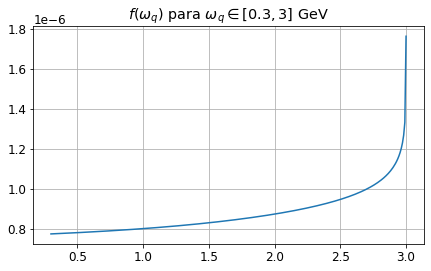

In [21]:
# Importamos las funciones de Bessel modificadas de primera clase de la libreria de Scipy.
from scipy.special import i0,i1
# from scipy import constants as cte

# Definimos nuestras constantes.
a = 1; eB = 0.02; Lambda = 2; wq=3;

# Definimos las funciones n(w) y gf(w)
n  = lambda w: 3 / (np.exp(w/Lambda) -1)
gf = lambda w: (w**2 + wq**2 - w*wq)/(2*eB)

# Definimos la función F(w) para los fotones
def F(w):
    T1 = (2*(w**2) + wq**2 - w*wq);
    T2 = np.exp(-gf(w));
    T3 = n(w);
    T4 = (1 + 2*n(abs(wq - w)));
    T5 = (i0(gf(w)) - i1(gf(w)))
    return T1*T2*T3*T4*T5 

# Resolvemos el método de cuadratura gaussiana, por su simplicidad y mejor resultado en integrales numéricas.

I1 = IntGauss(100, 0, wq , F)
cte2 = (a*np.pi)/(2*(2*np.pi)**6*wq)
print(f"El valor de la integral es: {cte2*I1}")

# Definimos nuestro espacio lineal

W = np.linspace(0.3,3,300)
fW = W*0;

for k in range(0,len(W)):
    w  = W[k]
    I2 = IntGauss(100, 0, w, F)
    fW[k] = cte2 * I2

plt.figure(figsize=(7,4))
plt.plot(W, fW)
plt.title(r"$f(\omega_q)$ para $\omega_q\in[0.3,3]$ GeV"); plt.grid(); plt.show();


## Ecuaciones diferenciales ordinarias

### Metodos a evaluar 

In [22]:
def EDO2(f, to, tf, xi, vi, h, metodo):
    lista_t = np.arange(to,tf,h)
    lista_x = []
    lista_v = []
    r = np.array([xi,vi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_v.append(r[1])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_v)

def Euler2(f,r,t,h):
    r += h * f(r,t)
        
def RK22(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2
        
def RK42(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t+ 0.5*h)
    k4 = f(r + h*k3, t + h)
    r += h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
def Heun2(f,r,t,h):
    f1 = f(r,t)
    r1 = r + (h*f1)
    t += h
    f2 = f(r1,t)
    r += h*(1/2*(f1+f2))

8. **Pendulo Doble**
    En clase resolvimos el péndulo no lineal, también hemos hecho el péndulo amortiguado, anarmónico y cuántico. Ahora es el turno de resolver el péndulo doble. Supondremos que no tiene fricción, que las dos masas son iguales y que $L_1 = L_2 = L$ (ve la figura 1):

    (i) Deriva las ecuaciones de movimiento a programar. Usa la formulación Lagrangiana.
    
    (ii) Resuelve numéricamente las ecuaciones diferenciales con el método que prefieras y luego
    gráfica $\theta_1$ y $\theta_2$ con respecto a $t$. Defiende el método que escogiste, discute como es la simetría
    temporal y error, compara con otros métodos.
    
    Deriva las ecuaciones anteriores. Usa la formulación Lagrangiana.
    
   ![pendulo](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/pendulo.jpg?raw=true)
-------------

Dado que trabajamos con un sistema de dos masas $m_1$ y $m_2$, donde cada una con un grado de libertad $\theta_1$, y $\theta_2$, que son los ángulos de dichas masas respecto a la normal como se puede apreciar en la figura anterior. Entonces las componentes de las posiciones de las masas y sus velocidades son las siguientes. Además $L_1=L_2=L$ y $m_1=m_2=m$ por hipótesis entonces

\begin{align*} 
x_1 & =  L\sin\theta_1 & \dot{x}_1 &= L\dot{\theta}_1\cos\theta_1\\
y_1 & = -L\cos\theta_1 & \dot{y}_1 &= L\dot{\theta}_1\sin\theta_1\\
x_2 & =  L(\sin\theta_1 + \sin\theta_2) & \dot{x}_2 &= L(\dot{\theta}_1\cos\theta_1 + \dot{\theta}_2\cos\theta_2)\\
y_2 & = -L(\cos\theta_1 + \cos\theta_2) & \dot{y}_2 &= L(\dot{\theta}_1\sin\theta_1 + \dot{\theta}_2\sin\theta_2) \end{align*}

De donde se obtiene la energía potencial $V$ y la energía cinética $T$ de las masas

\begin{align*} 
V &= mg(y_1 + y_2) = -mgL\left(2\cos\theta_1 + \cos\theta_2\right)\\
T &= \tfrac{1}{2}m(v_1^2 + v_2^2) = \tfrac{1}{2}m\left(\dot{x}_1^2 + \dot{y}_1^2 + \dot{x}_2^2 + \dot{y}_2^2\right)\\ 
&= \tfrac{1}{2}mL^2\left(2\dot{\theta}_1^2 + \dot{\theta}_2^2 + 2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\right) \end{align*}

Y como el lagrangiano lo definimos como $\mathcal{L} = T - V$ entonces

\begin{align*} 
\mathcal{L} = \tfrac{1}{2}mL^2\left(2\dot{\theta}_1^2 + \dot{\theta}_2^2 + 2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\right) + mgL\left(2\cos\theta_1 + \cos\theta_2\right)
\end{align*}

Ahora podemos obtener las ecuaciones de movimiento de Euler-Lagrange cuya formula es

\begin{align*} 
\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial\mathcal{L}}{\partial \dot{q}_i}\right) - \frac{\partial \mathcal{L}}{\partial q_i} = 0, 
\end{align*}

para $q_i =\theta_1,\ \theta_2$. Entonces para $\theta_1$ y $\theta_2$ obtenemos lo siguiente

\begin{align*} 
L\left(2\ddot{\theta}_1 + \ddot{\theta}_2\cos(\theta_1 - \theta_2) + \dot{\theta}_2^2\sin(\theta_1 - \theta_2)\right) + 2g\sin\theta_1 &= 0,\\
L\left( \ddot{\theta}_2 + \ddot{\theta}_1\cos(\theta_1 - \theta_2) - \dot{\theta}_1^2\sin(\theta_1 - \theta_2)\right) + g\sin\theta_2 = 0. 
\end{align*}

entonces para resolverlo de manera numérica definimos $z_1 \equiv \dot{\theta_1} \Rightarrow \ddot{\theta}_1 = \dot{z}_1$ y también $z_2 \equiv \dot{\theta_2} \Rightarrow \ddot{\theta}_2 = \dot{z}_2$. Y al simplificar tenemos las siguientes expresiones para $\dot{z}_1$ y $\dot{z}_2$, además considera $\omega=g/L$

\begin{align*} 
\dot{z}_1 = \frac{\cos(\theta_1-\theta_2)\left( \omega\sin\theta_2 - z_1^2\sin(\theta_1-\theta_2)\right)-2\omega\sin\theta_1 -z_2^2\sin(\theta_1-\theta_2)}{1 + \sin^2(\theta_1-\theta_2)},\\
\dot{z}_2 = \frac{\cos(\theta_1-\theta_2)\left(2\omega\sin\theta_1 + z_2^2\sin(\theta_1-\theta_2)\right)-2\omega\sin\theta_2 +2z_1^2\sin(\theta_1-\theta_2)}{1+\sin^2(\theta_1-\theta_2)} \end{align*}


Notemos que podemos reescribir el anterior sistema de ecuaciones de manera matricial como 

\begin{equation*}
\begin{pmatrix} \dot{\theta}_1 \\ \dot{\theta}_2 \end{pmatrix}=
\begin{pmatrix} z_1 \\ z_2 \end{pmatrix}\end{equation*}

\begin{equation*}
\begin{pmatrix} \dot{z}_1 \\ \dot{z}_2 \end{pmatrix}= \frac{1}{1+\sin(\theta_1-\theta_2)^2}
\begin{pmatrix} \cos(\theta_1-\theta_2)\left( \omega\sin\theta_2 - z_1^2\sin(\theta_1-\theta_2)\right)-2\omega\sin\theta_1 -z_2^2\sin(\theta_1-\theta_2)\\ 
\cos(\theta_1-\theta_2)\left(2\omega\sin\theta_1 + z_2^2\sin(\theta_1-\theta_2)\right)-2\omega\sin\theta_2 +2z_1^2\sin(\theta_1-\theta_2)
\end{pmatrix}
\end{equation*}



In [23]:
def Pendulo_doble(r,t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = B
    
    #Elementos de la matriz A
    a11 = 1
    a12 = 0
    a21 = 0
    a22 = 1
    A = np.array ([[a11,a21], [a21,a22]])
    
    #elementos del vector B
    c  = 1 + np.sin(x1-x2)**2
    b1 = np.cos(x1-x2)*(w*np.sin(x2) -v1**2*np.sin(x1-x2))   -2*w*np.sin(x1) -  v2**2*np.sin(x1-x2)
    b2 = np.cos(x1-x2)*(2*w*np.sin(x2) +v2**2*np.sin(x1-x2)) -2*w*np.sin(x2) +2*v1**2*np.sin(x1-x2)
    B = np.array([b1/c,b2/c])
    
    #multiplicacion de matrices para obtener x
    #x tendra las segundas derivadas
    x = np.linalg.inv(A).dot(B)
    
    #despues de aplicar el proceso iterativo de un metodo numerico
    #el nuevo vector r tendra como r1=posicion1, r2=posicion2
    #r3= velocidad1,  r4 = velocidad2
    
    r = np.array([v1, v2, x[0], x[1]])
    return r

def EDO2_sistema(f, to, tf, x1i, x2i,  v1i, v2i, h, metodo):
    lista_t = np.arange(to,tf,h)
    lista_x1 = []
    lista_x2 = []
    lista_v1 = []
    lista_v2 = []
    r = np.array([x1i, x2i, v1i, v2i],float)
    for t in lista_t:
        lista_x1.append(r[0])
        lista_x2.append(r[1])
        lista_v1.append(r[2])
        lista_v2.append(r[3])
        metodo(f,r,t,h)
    return (lista_t, lista_x1, lista_x2, lista_v1, lista_v2)

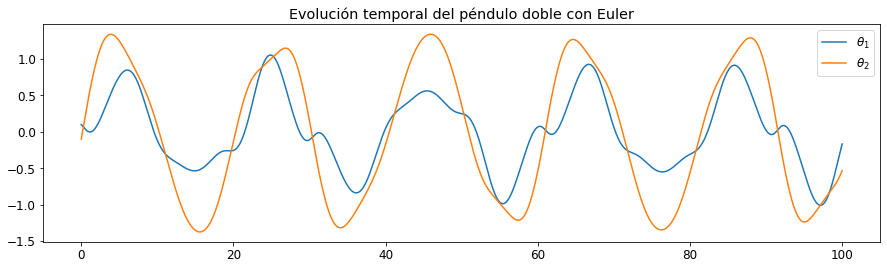

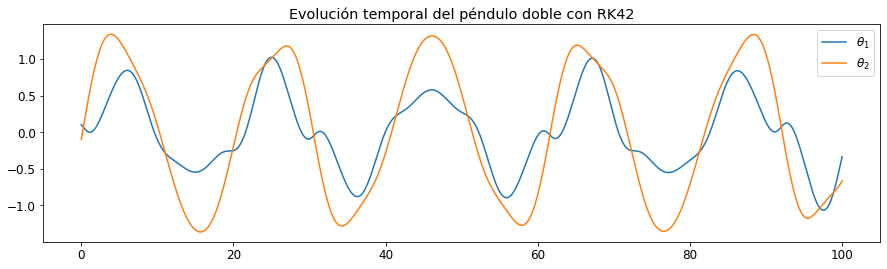

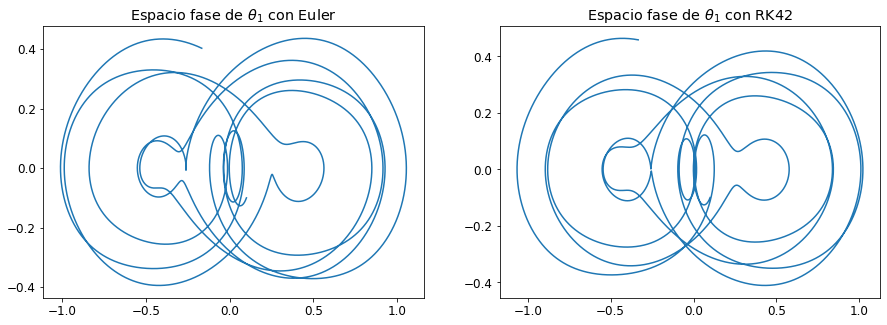

In [31]:
w = 0.3;
x1, x2 = 0.1, -0.1
v1, v2 =-0.1, 0.6

M1 = EDO2_sistema(Pendulo_doble, 0, 100, x1, x2, v1, v2, 0.01, Euler2)
M2 = EDO2_sistema(Pendulo_doble, 0, 100, x1, x2, v1, v2, 0.01, RK42)

plt.figure(figsize=(15,4))
plt.plot(M1[0], M1[1], label=r"$\theta_1$")
# plt.plot(M1[0], M1[3], ":", label=r"$\dot\theta_1$")
plt.plot(M1[0], M1[2], label=r"$\theta_2$")
# plt.plot(M1[0], M1[4], ":", label=r"$\dot\theta_2$")
plt.title(r"Evolución temporal del péndulo doble con Euler"); plt.legend(); plt.show();
                  
plt.figure(figsize=(15,4))
plt.plot(M2[0], M2[1], label=r"$\theta_1$")
# plt.plot(M2[0], M2[3], ":", label=r"$\dot\theta_1$")
plt.plot(M2[0], M2[2], label=r"$\theta_2$")
# plt.plot(M2[0], M2[4], ":", label=r"$\dot\theta_2$")
plt.title(r"Evolución temporal del péndulo doble con RK42"); plt.legend(); plt.show();

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(M1[1], M1[3])
ax1.set_title(r"Espacio fase de $\theta_1$ con Euler")

ax2.plot(M2[1], M2[3])
ax2.set_title(r"Espacio fase de $\theta_1$ con RK42")
plt.show();

En este caso se trabajó con el método de Euler y con Runge de orden 4. En el caso del método de Euler, se ve un sistema más caótico a comparación del método de Runge que mantiene una simetría temporal más visible en la grafica.

En este caso preferimos el método de Runge ya que ofrece un error y puede trabajar con tiempos más largos por lo que es más estable y su error no explota.

9. **Comparemos métodos**
    El bloque de hierro magnetizado de masa $m$ está unido a un resorte de rigidez $k$ y longitud $L$. El bloque está en reposo en $x = L$ cuando un electroimán está encendido, ejerciendo una fuerza de repulsión $F = c/x^2$ en el bloque. La ecuación de movimiento resultante es
    
    \begin{equation*}
        m\ddot x=\frac{c}{x^2}-k(x-L)
    \end{equation*}
    
   ![pendulo](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/resorte.jpg?raw=true)

    Determina la amplitud y el periodo. Resuelve usando tres métodos numéricos. Compara las soluciones obtenidas por los distintos métodos. Explica, ¿Por qué usas estos métodos?

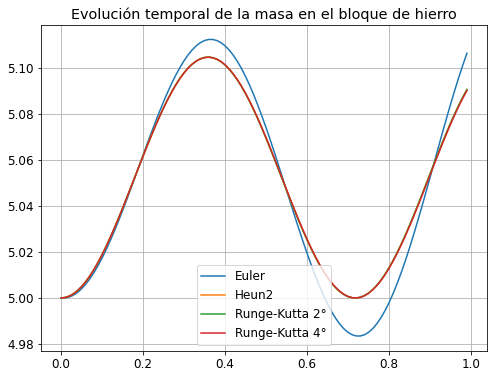

In [25]:
# Definimos la función del bloque de fierro como f_ierro()
def f_ierro(r, t):
    x, v= r[0], r[1]
    fx = v
    fv = (c/(x**2) - k*(x-L))/m
    return np.array([fx,fv],float)

# Guardamos los resultados con diferentes métodos en las variables M
L = 5.0; c = 100.0; m = 1.0; k = 75.0
h, xi, vi= 0.01, 5, 0
to, tf = 0.0, 1.0

M1 = EDO2(f_ierro, to, tf, xi, vi, h, Euler2)
M2 = EDO2(f_ierro, to, tf, xi, vi, h, Heun2)
M3 = EDO2(f_ierro, to, tf, xi, vi, h, RK22)
M4 = EDO2(f_ierro, to, tf, xi, vi, h, RK42)

# Ahora graficamos cada metodo para poder visualizarlos

plt.plot(M1[0], M1[1], label=r"Euler")
plt.plot(M2[0], M2[1], label=r"Heun2")
plt.plot(M3[0], M3[1], label=r"Runge-Kutta 2°")
plt.plot(M4[0], M4[1], label=r"Runge-Kutta 4°")
plt.title(r"Evolución temporal de la masa en el bloque de hierro")
plt.legend(); plt.grid(); plt.show();

In [26]:
np.sqrt(k/m), 1/(np.sqrt(k/m)/(2*np.pi))

(8.660254037844387, 0.725519745693687)

Se tiene que para valores pequeños de $c$, la frecuencia esta dada por $f\approx \sqrt{k/m}=8.66$ Hz que es lo mismo a un periodo de $\tau\approx 0.73$ s.

Podemos verificar que los métodos de Runge-Kutta de 2° y 4° órden junto al método de Heun son estables y dan una solucón numérica bastante similar, sino es que idéntica. Sin embargo, el método de Euler necesita mayor presición puesto que da soluciones erroneas a este problema con una onda que se amplifica indefinidamente.

10. **Numerov**
    Aplicar el algoritmo Numerov para resolver
    
    \begin{equation*}
        u''(x)=-4\pi^2u(x)
    \end{equation*}
    
    con $u(0) = 1$ y $u'(0) = 0$. Discute la precisión del resultado comparando con la solución obtenida por el método de Runge-Kutta de orden 4 y con el resultado exacto.
___________

Sabemos que el metodo de Numerov se usa para resolver ecuaciones de la forma:

$$ \frac{d^2 y}{dx^2} = - g(x) y(x) + s(x)$$

Donde se toman 3 valores $ y_{n-1}, y_n, y_{n+1} $ usando puntos equidistantes $ x_{n-1}, x_n, x_{n+1} $. La relación entre ellos es:


$$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$$

Donde:

$y_n = y(x_n) $, $ g_n = g(x_n)$, $ s_n = s(x_n) $ y $ h = x_{n+1} - x_n$


En nuestro caso tenemos: 

$$\frac{d^2 u(x)}{dx^2} = -4\pi^2 u(x) $$

donde vamos a tener la condición inicial $u(0) = 0$, y en otro caso $u(0) = 1$, por lo que $g(x) = 4\pi^2$ y $s(x) = 0$

In [27]:
g = lambda x: 4*(np.pi**2);
s = lambda x: 0;

def Numerov(gnumerov, snumerov, a, b, N, y0):
    h = (b-a)/N
    h12 = (h**2)/12
    #intervalo de tiempo
    lista_t = np.arange(a, b, h)
    #lista donde guardaremos las soluciones y
    lista_y = []

    g0 = gnumerov(a)
    g1 = gnumerov(a+h) 
    s0 = snumerov(a)
    s1 = snumerov(a+h)
    
    #suponer cual sera la sig solucion y1
    y1 = y0 + h/2

    #agregar las primeras dos soluciones a lista_y
    lista_y.append(y0)
    lista_y.append(y1)
    
    #metodo iterativo de Numerov
    #Comenzamos a iterar desde el tercer elemento del intervalo de tiempo
    #ya que tenemos las primeras dos soluciones
    for i in range(2, len(lista_t)):
        x = lista_t[i]
        #calculamos los n+1
        g2 = gnumerov(x)
        s2 = snumerov(x)
        #terminos para calcular y_n+1
        ca = (1 + h12*g2)
        cb = 2*y1*(1- 5*h12*g1)
        cc = y0 * (1 + h12*g0)
        cd = h12 * (s2 + 10*s1 +s0)
        y2 = (cb -cc +cd)/ca
        lista_y.append(y2)
        #actualizamos las variables
        y0 = y1
        y1 = y2
        g0 = g1
        g1 = g2
        s0 = s1
        s1 = s2
        
    return lista_t, lista_y  

def f(r,t):
    g=-9.81
    x=r[0]
    v=r[1]
    fx=v
    fv=-4*np.pi**2*x
    return np.array([fx,fv],float)

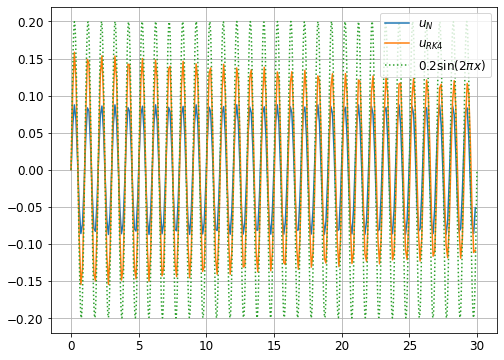

In [28]:
T = np.linspace(0,30,1000);
U = (lambda x: 0.2*np.sin(2*np.pi*x))(T)

M1 = Numerov(g, s, 0, 30, 250, 0);
M2 = EDO2(f, 0, 30, 0, 1, 30/250, RK42);

plt.plot(M1[0], M1[1], label=r"$u_{N}$")
plt.plot(M2[0], M2[1], label=r"$u_{RK4}$")
plt.plot(T, U, ":", label=r"$0.2\sin(2\pi x)$")

plt.grid(); plt.legend(); plt.plot();

Podemos ver que las soluciones numéricas y analíticas son equivalentes, solamente difieren en la amplitud de la onda. Sin embargo, todas estas funciones siguen siendo solución de la ecuación diferencial propuesta en el ejercicio para tiempos de exposición relativamente cortos.

Al trabajar con rangos de tiempo más largos, vemos que la solución obtenida por el método de Numerov es bastante estable a comparación de la obtenida con Runge-Kutta de orden 4 por lo que tenemos mayor precisión en la resolución de ED al trabajar con el método de Numerov